In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Análisis exploratorio de los datos de vertimento diarios**

In [ ]:
# descarga de los vertimientos diarias desde el 2000 hasta 2019
temp_vertimento_diario = pd.DataFrame({'Fecha' : []})
for year in range(2000,2020):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Vertimentos/Vertimentos_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    new_data.columns = ['Fecha', 'Region Hidrologica', 'Nombre Embalse','Vertimientos Volumen miles m3', 'Vertimientos Energía kWh']
    #pd.concat([df1, df4], ignore_index=True, sort=False)
    temp_vertimento_diario = pd.concat([temp_vertimento_diario, new_data])
temp_vertimento_diario['Vertimiento Energía gWh'] = temp_vertimento_diario['Vertimientos Energía kWh']/1000000

In [ ]:
# descarga de los vertimientos diarias desde el 2020 hasta 2022
temp_vertimento_diario_2 = pd.DataFrame({'Fecha' : []})
for year in range(2020,2022):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Vertimentos_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    new_data.columns = ['Fecha', 'Region Hidrologica', 'Nombre Embalse','Vertimientos Volumen miles m3', 'Vertimientos Energía kWh']
    #pd.concat([df1, df4], ignore_index=True, sort=False)
    temp_vertimento_diario_2 = pd.concat([temp_vertimento_diario_2, new_data])
temp_vertimento_diario_2['Vertimiento Energía gWh'] = temp_vertimento_diario_2['Vertimientos Energía kWh']/1000000

In [ ]:
# descarga de los aportes diarios desde el 2000 hasta 2021
temp_aportes_diario = pd.DataFrame({'Fecha' : []})
for year in range(2000, 2020):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Aportes/Aportes_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    temp_aportes_diario = pd.concat([temp_aportes_diario, new_data])
    temp_aportes_diario = temp_aportes_diario.drop(['Unnamed: 0'],axis=1)
temp_aportes_diario['Aportes Energía gWh'] = temp_aportes_diario['Aportes Energía kWh']/1000000
temp_aportes_diario['Aportes %'] = temp_aportes_diario['Aportes %']*100

In [ ]:
# descarga de los aportes diarios desde el 2020 hasta 2021
temp_aportes_diario_2 = pd.DataFrame({'Fecha' : []})
for year in range(2020, 2022):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Aportes_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    temp_aportes_diario_2 = pd.concat([temp_aportes_diario_2, new_data])
    temp_aportes_diario_2 = temp_aportes_diario_2.drop(['Unnamed: 0'],axis=1)
temp_aportes_diario_2['Aportes Energía gWh'] = temp_aportes_diario_2['Aportes Energía kWh']/1000000
temp_aportes_diario_2['Aportes %'] = temp_aportes_diario_2['Aportes %']*100

In [ ]:
# descarga de las reservas diarias desde el 2000 hasta 2021
temp_reserva_diario = pd.DataFrame({'Fecha' : []})
for year in range(2000, 2020):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Reservas/Reservas_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    temp_reserva_diario = pd.concat([temp_reserva_diario, new_data])
temp_reserva_diario['Volumen Útil Diario Energía gWh'] = temp_reserva_diario['Volumen Útil Diario Energía kWh']/1000000
temp_reserva_diario['Volumen Energía gWh'] = temp_reserva_diario['Volumen Energía kWh']/1000000
temp_reserva_diario['Volumen Útil Díario %'] = temp_reserva_diario['Volumen Útil Díario %']*100
temp_reserva_diario['Volumen %'] = temp_reserva_diario['Volumen %']*100

In [ ]:
# descarga de las reservas diarias desde el 2020 hasta 2021
temp_reserva_diario_2 = pd.DataFrame({'Fecha' : []})
for year in range(2020, 2022):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Reservas_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    temp_reserva_diario_2 = pd.concat([temp_reserva_diario_2, new_data]) 
temp_reserva_diario_2['Volumen Útil Diario Energía gWh'] = temp_reserva_diario_2['Volumen Útil Diario Energía kWh']/1000000
temp_reserva_diario_2['Volumen Energía gWh'] = temp_reserva_diario_2['Volumen Energía kWh']/1000000
temp_reserva_diario_2['Volumen Útil Díario %'] = temp_reserva_diario_2['Volumen Útil Díario %']*100
temp_reserva_diario_2['Volumen %'] = temp_reserva_diario_2['Volumen %']*100

In [ ]:
df_vert = pd.concat([temp_vertimento_diario,temp_vertimento_diario_2])
df_ap = pd.concat([temp_aportes_diario,temp_aportes_diario_2])
df_rd = pd.concat([temp_reserva_diario,temp_reserva_diario_2])

In [ ]:
# grupo por suma
df_temp_vert=df_vert.groupby(["Fecha"]).sum().reset_index().loc[:,["Fecha",'Vertimientos Volumen miles m3','Vertimiento Energía gWh']]
df_temp_ap=df_ap.groupby(["Fecha"]).sum().reset_index().loc[:,["Fecha",'Aportes Caudal m3/s','Aportes Energía gWh']]
df_temp_rd=df_rd.groupby(["Fecha"]).sum().reset_index().loc[:,["Fecha",'Volumen Útil Diario Mm3','Volumen Mm3',
                                                               'Volumen Útil Diario Energía gWh','Volumen Energía gWh']]

In [ ]:
df_temp = df_temp_ap.merge(df_temp_vert,how = 'inner',on='Fecha')
df_temp = df_temp.merge(df_temp_rd, how='inner', on = 'Fecha')
df_temp.columns = ['Date', 'Flow contribucion (m3/s)','Energy contribution (gWh)', 'Discharges Volume thousands m3',
                   'Discharge Energy (gWh)','Daily useful Volume (Mm3)','Volume (Mm3)','Daily useful Volume Energy (gWh)',
                   'Volume Energy (gWh)']

In [ ]:
df_temp.head(5)

,Date,Flow contribucion (m3/s),Energy contribution (gWh),Discharges Volume thousands m3,Discharge Energy (gWh),Daily useful Volume (Mm3),Volume (Mm3),Daily useful Volume Energy (gWh),Volume Energy (gWh)
0,2000-01-01,719.10,56.6773,16212.9922,23.887806,5454.0068,6024.5120,10732.350532,11548.8853
1,2000-01-02,768.34,54.6452,14161.0631,20.584258,5421.8808,5992.3860,10712.492849,11529.0276
2,2000-01-03,757.50,57.4883,13370.1628,19.369448,5390.9129,5961.4181,10677.373760,11493.9081
3,2000-01-04,739.93,58.4182,13292.4191,18.710281,5364.3178,5934.8230,10643.980148,11460.5150
4,2000-01-05,729.85,63.0395,16737.6356,21.166744,5345.9628,5916.4680,10614.021370,11430.5566


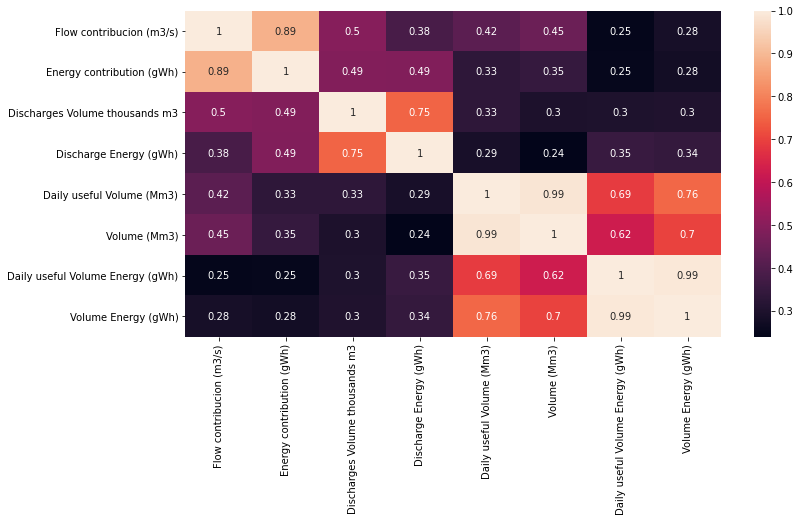

In [ ]:
correlation = df_temp.corr()
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(correlation, annot = True,fmt = '.2g' )
plt.show()
fig.savefig('correlation_hydrology.jpg')